In [74]:
import copy
import sre_parse
import sre_constants
from random import Random
from importlib import reload
from dataclasses import asdict
from typing import Tuple
from collections import defaultdict, Counter

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import Path as MarkerPath
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection
import seaborn as sns
from ipywidgets import Accordion, HTML, VBox, HBox, Output, Button, Layout, Dropdown, Tab, Widget, GridBox, Text
from ipywidgets import Label, GridspecLayout
from tqdm import tqdm

In [140]:
import constants
reload(constants)
import solver
reload(solver)

<module 'solver' from '/data/Development/regex_crossword/solver.py'>

In [60]:
def close_all_figures():
    for manager in matplotlib._pylab_helpers.Gcf.get_all_fig_managers():
        plt.close(manager.canvas.figure)
close_all_figures()

%config InlineBackend.close_figures=True 
plt.ion()

In [141]:
strings = solver.build_strings()
len(strings)

39

In [142]:
strings_df = pd.DataFrame([
    {'axis': s.name[0],
     'name': s.name,
     'pattern': s.pattern.raw,
     'size': s.size}
    for s in strings])
strings_df

,axis,name,pattern,size
0,y,y0,.(C|HH)*,7
1,y,y1,R*D*M*,8
2,y,y2,N.*X.X.X.*E,9
3,y,y3,(RR|HHH)*.?,10
4,y,y4,([^X]|XCC)*,11
5,y,y5,(...?)\1*,12
6,y,y6,[^C]*[^R]*III.*,13
7,y,y7,C*MC(CCC|MM)*,12
8,y,y8,.*,11
9,y,y9,(O|RHH|MM)*,10


In [6]:
def widget_container(container_type, *labeled_children: Tuple[str, Widget]):
    titles, children = zip(*labeled_children)
    accordion = container_type(children)
    for i, t in enumerate(titles):
        accordion.set_title(i, t)
    return accordion

In [5]:
widgets = []
with tqdm(strings) as t:
    for s in t:
        ps = list(s.gen_possible())
        output = Output()
        with output:
            display(asdict(s.pattern.re))
            print('Size', s.size)
            print('Span', s.pattern.re.span())
            print('Possible Matches')
            for m in ps:
                print(' ', m.chr_seq)
        widgets.append((f'{s.pattern.raw} sz={s.size} ps={len(ps)}', output))
    
widget_container(Accordion, *widgets)

100%|██████████| 39/39 [00:02<00:00, 17.24it/s]


NameError: name 'widget_container' is not defined

In [302]:
%config InlineBackend.close_figures=False 
plt.ioff()
close_all_figures()

widgets = []
with tqdm(pd.Series(strings, dtype=object).sample(15, random_state=0xCAFE)) as t:
    for s in t:
        solution = next(iter(solver.Solution.generate_solutions(s)))
        output = Output()
        with output:
            f = plt.figure(figsize=(14, 14))
            ax = f.add_subplot(111)
            solver.draw_puzzle(ax=ax, fontsize=15, solution=solution)
            display(f)
        widgets.append((f'{s.pattern.raw} sz={s.size} {s.name}', output))
        
widget_container(Accordion, *widgets)

100%|██████████| 15/15 [00:04<00:00,  3.33it/s]


Accordion(children=(Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), …

In [303]:
%config InlineBackend.close_figures=True 
plt.ion()
close_all_figures()

In [143]:
with tqdm(strings) as t:
    string_solutions = [solver.SolutionSet.for_string(s) for s in t]

100%|██████████| 39/39 [00:02<00:00, 18.13it/s]


In [144]:
string_solutions_df = pd.Series([len(s) for s in string_solutions],
                                strings_df['name'], name='count').reset_index()
string_solutions_df

,name,count
0,y0,13
1,y1,45
2,y2,3
3,y3,12
4,y4,41
5,y5,2
6,y6,66
7,y7,27
8,y8,1
9,y9,274


In [9]:
def only(xs):
    x, = xs
    return x

axes_solution_sets = defaultdict(list)
for s in pd.Series(string_solutions): #.sample(15, random_state=0xCAFE):
    axes_solution_sets[only(s.names)[0]].append(s)

solution_sets = solver.merge_cross_axes_solution_sets(axes_solution_sets)
len(solution_sets)

merge cross axis z12 sz=44: 100%|██████████| 39/39 [00:26<00:00,  1.48it/s] 


38

In [170]:
random = Random(0xCAFE)
max_reduce_size = 5000
too_large = []
reduced = string_solutions
while len(reduced) > 1:
    print(len(reduced), sorted(map(len, reduced)))
    results = solver.reduce_solution_sets_by_lowest_estimated_count(reduced, random)
    reduced = [ss for ss in results if len(ss) <= max_reduce_size]
    too_large.extend(ss for ss in results if len(ss) > max_reduce_size)


estimating intersection (2,19):  12%|█▏        | 91/741 [00:00<00:01, 561.89it/s] 

39 [1, 1, 1, 2, 3, 3, 3, 5, 5, 7, 7, 7, 8, 8, 9, 10, 10, 11, 12, 13, 15, 21, 21, 27, 28, 28, 28, 35, 41, 41, 44, 45, 55, 66, 89, 256, 274, 683, 1365]


estimating intersection (2,13):  12%|█▏        | 83/703 [00:00<00:01, 525.52it/s] 

38 [1, 1, 2, 3, 3, 3, 5, 5, 7, 7, 7, 8, 8, 9, 10, 10, 11, 12, 13, 15, 21, 21, 27, 28, 28, 28, 35, 41, 41, 44, 45, 55, 66, 89, 256, 274, 683, 1365]


estimating intersection (1,36):  11%|█         | 70/666 [00:00<00:01, 501.71it/s] 

37 [1, 2, 3, 3, 3, 5, 5, 7, 7, 7, 8, 8, 9, 10, 10, 11, 12, 13, 15, 21, 21, 27, 28, 28, 28, 35, 41, 41, 44, 45, 55, 66, 89, 256, 274, 683, 1365]


estimating intersection (2,3):  11%|█         | 69/630 [00:00<00:01, 481.11it/s]  

36 [2, 3, 3, 3, 5, 5, 7, 7, 7, 8, 8, 9, 10, 10, 11, 12, 13, 15, 21, 21, 27, 28, 28, 28, 35, 41, 41, 44, 45, 55, 66, 89, 256, 274, 683, 1365]


estimating intersection (2,17):  14%|█▎        | 81/595 [00:00<00:00, 516.18it/s] 

35 [2, 3, 3, 5, 5, 7, 7, 7, 8, 8, 9, 10, 10, 11, 12, 13, 15, 21, 21, 27, 28, 28, 28, 35, 41, 41, 44, 45, 55, 66, 89, 256, 274, 683, 1365]


estimating intersection (1,32):  11%|█         | 63/561 [00:00<00:01, 436.36it/s]

34 [3, 3, 5, 5, 7, 7, 7, 8, 9, 10, 10, 11, 12, 13, 15, 16, 21, 21, 27, 28, 28, 28, 35, 41, 41, 44, 45, 55, 66, 89, 256, 274, 683, 1365]


estimating intersection (2,6):  12%|█▎        | 66/528 [00:00<00:00, 476.13it/s]  

33 [3, 5, 5, 7, 7, 7, 8, 9, 10, 10, 11, 12, 13, 14, 15, 21, 21, 27, 28, 28, 28, 35, 41, 41, 44, 45, 55, 66, 89, 256, 274, 683, 1365]


estimating intersection (1,31):  12%|█▏        | 60/496 [00:00<00:00, 439.88it/s] 

32 [5, 5, 7, 7, 7, 8, 9, 10, 10, 11, 12, 13, 14, 15, 21, 21, 27, 28, 28, 35, 41, 41, 44, 45, 48, 55, 66, 89, 256, 274, 683, 1365]


estimating intersection (1,29):  12%|█▏        | 57/465 [00:00<00:00, 414.16it/s] 

31 [5, 5, 7, 7, 7, 8, 9, 10, 10, 13, 14, 15, 16, 21, 21, 27, 28, 28, 35, 41, 41, 44, 45, 48, 55, 66, 89, 256, 274, 683, 1365]


estimating intersection (1,28):  13%|█▎        | 55/435 [00:00<00:01, 377.09it/s] 

30 [5, 7, 7, 7, 8, 9, 10, 10, 13, 14, 15, 21, 21, 27, 28, 28, 35, 41, 41, 44, 45, 48, 55, 64, 66, 89, 256, 274, 683, 1365]


estimating intersection (1,26):  13%|█▎        | 52/406 [00:00<00:00, 355.97it/s] 

29 [7, 7, 7, 8, 9, 10, 13, 14, 15, 21, 21, 27, 28, 28, 35, 41, 41, 42, 44, 45, 48, 55, 64, 66, 89, 256, 274, 683, 1365]


estimating intersection (1,25):  13%|█▎        | 50/378 [00:00<00:00, 351.79it/s] 

28 [7, 7, 8, 9, 10, 13, 15, 21, 21, 27, 28, 28, 35, 41, 41, 42, 44, 45, 45, 48, 55, 64, 66, 89, 256, 274, 683, 1365]


estimating intersection (1,22):  13%|█▎        | 46/351 [00:00<00:00, 339.35it/s] 

27 [7, 8, 10, 13, 15, 21, 21, 27, 28, 28, 35, 39, 41, 41, 42, 44, 45, 45, 48, 55, 64, 66, 89, 256, 274, 683, 1365]


estimating intersection (1,22):  14%|█▍        | 45/325 [00:00<00:00, 314.05it/s] 

26 [7, 8, 13, 15, 21, 21, 27, 28, 28, 35, 39, 41, 41, 42, 44, 45, 48, 55, 64, 66, 89, 159, 256, 274, 683, 1365]


estimating intersection (1,21):  14%|█▍        | 43/300 [00:00<00:00, 316.63it/s] 

25 [8, 13, 15, 21, 21, 27, 28, 28, 35, 39, 41, 41, 42, 44, 45, 48, 55, 66, 89, 159, 256, 272, 274, 683, 1365]


estimating intersection (0,22):   8%|▊         | 21/276 [00:00<00:01, 185.42it/s]

24 [8, 15, 21, 21, 27, 28, 28, 35, 39, 41, 42, 44, 45, 48, 55, 66, 89, 140, 159, 256, 272, 274, 683, 1365]


estimating intersection (0,22):   8%|▊         | 21/253 [00:00<00:01, 166.86it/s]

23 [15, 21, 21, 27, 28, 28, 35, 39, 41, 42, 44, 45, 55, 66, 89, 140, 159, 256, 272, 274, 357, 683, 1365]


estimating intersection (0,20):   8%|▊         | 19/231 [00:00<00:01, 163.82it/s]

22 [15, 21, 21, 28, 28, 35, 39, 41, 42, 44, 45, 55, 66, 140, 159, 168, 256, 272, 274, 357, 683, 1365]


estimating intersection (0,18):   8%|▊         | 17/210 [00:00<00:01, 122.65it/s]

21 [21, 21, 28, 28, 35, 41, 42, 44, 45, 55, 66, 140, 159, 168, 256, 272, 273, 274, 357, 683, 1365]


estimating intersection (0,14):   7%|▋         | 13/190 [00:00<00:01, 101.76it/s]

20 [21, 21, 28, 28, 35, 41, 42, 44, 55, 66, 140, 168, 256, 272, 273, 274, 336, 357, 683, 1365]


estimating intersection (0,14):   8%|▊         | 13/171 [00:00<00:01, 98.74it/s] 

19 [21, 28, 28, 35, 41, 44, 55, 66, 140, 168, 256, 272, 273, 274, 336, 357, 625, 683, 1365]


estimating intersection (0,13):   8%|▊         | 12/153 [00:00<00:01, 82.84it/s]

18 [28, 28, 41, 44, 55, 66, 140, 168, 256, 272, 273, 274, 336, 357, 625, 683, 735, 1365]


estimating intersection (0,13):   9%|▉         | 12/136 [00:00<00:01, 83.04it/s]

17 [28, 28, 41, 44, 55, 66, 140, 256, 272, 273, 274, 357, 625, 683, 735, 1200, 1365]


estimating intersection (0,11):   8%|▊         | 10/120 [00:00<00:01, 76.39it/s]

16 [41, 44, 55, 66, 140, 256, 272, 273, 274, 357, 588, 625, 683, 735, 1200, 1365]


estimating intersection (0,8):   7%|▋         | 7/105 [00:00<00:01, 58.17it/s]  

15 [44, 55, 66, 140, 256, 272, 273, 274, 357, 588, 625, 683, 735, 1365, 1800]


estimating intersection (0,8):   8%|▊         | 7/91 [00:00<00:01, 53.29it/s]  

14 [66, 140, 256, 272, 273, 274, 357, 588, 625, 683, 735, 1365, 1800, 2420]


estimating intersection (0,7):   9%|▉         | 6/66 [00:00<00:01, 43.49it/s]  

12 [66, 140, 272, 273, 274, 357, 588, 625, 735, 1365, 1800, 2420]


estimating intersection (0,7):  11%|█         | 6/55 [00:00<00:01, 43.01it/s]  

11 [66, 140, 272, 273, 274, 588, 625, 735, 1365, 2420, 4620]


estimating intersection (0,7):  13%|█▎        | 6/45 [00:00<00:00, 48.59it/s]  

10 [66, 140, 273, 274, 588, 625, 735, 1365, 2420, 2754]


estimating intersection (0,7):  17%|█▋        | 6/36 [00:00<00:00, 44.62it/s]  

9 [66, 273, 274, 588, 625, 735, 1365, 2420, 4608]


estimating intersection (0,6):  18%|█▊        | 5/28 [00:00<00:00, 35.54it/s]  

8 [66, 274, 588, 625, 735, 1288, 1365, 2420]


estimating intersection (0,6):  24%|██▍       | 5/21 [00:00<00:00, 37.23it/s]  

7 [66, 274, 588, 625, 1365, 2420, 2732]


estimating intersection (1,3):  50%|█████     | 5/10 [00:00<00:00, 33.81it/s]

5 [66, 588, 625, 1365, 2420]


estimating intersection (1,2): 100%|██████████| 3/3 [00:00<00:00, 27.99it/s]

3 [625, 1365, 2420]


In [191]:
np.argmin(np.array([1.0, 3.0, np.nan, 4.0]))

2

In [172]:
len(too_large)

4

In [148]:
a, b, *rest = sorted(reduced, key=len, reverse=False)
a.estimate_intersection_size(b, random, 250)

72180728.95488

In [94]:
len(a.intersection(b))

441

In [31]:
n_cells = sum(solver.row_size(i) for i in range(constants.size))
n_cells

127

In [99]:
overlap.min().idxmin()

'y3'

In [102]:
overlap['y3'].idxmin()

'z1'

In [103]:
solutions_by_name = {ss.names_str:ss for ss in string_solutions}
a = solutions_by_name['y3']
b = solutions_by_name['z1']
print(a.estimate_intersection_size(b, random))
print(len(a.intersection(b)))

84.0
7


In [119]:
solution_sets = list(reduced)
n = len(solution_sets)
indexes = ((i, j) for i in range(n) for j in range(i + 1, n))
i, j = min(indexes, key=lambda x: solution_sets[x[0]].estimate_intersection_size(solution_sets[x[1]], random))

In [120]:
i,j

(14, 15)

In [121]:
a = solution_sets[i]
b = solution_sets[j]
len(a), len(b)

(168, 73728)

In [134]:
size_estimates = pd.DataFrame([
    {'sample_size': sample_size,
     'estimate': a.estimate_intersection_size(b, random, sample_size=sample_size),
     'trial': i}
    for sample_size in [25, 100, 200]
    for i in range(25)])
size_estimates

,sample_size,estimate,trial
0,25,0.0000,0
1,25,0.0000,1
2,25,39636.1728,2
3,25,19818.0864,3
4,25,59454.2592,4
...,...,...,...
70,200,9599.3856,20
71,200,10218.7008,21
72,200,7431.7824,22
73,200,7122.1248,23


In [138]:
best_size_estimate = ((size_estimates['estimate'] * size_estimates['sample_size']).sum() /
                       size_estimates['sample_size'].sum())
best_size_estimate

8735.202697846154

In [139]:
best_size_estimate / len(a) / len(b)

0.0007052307692307692

sample_size
25     AxesSubplot(0.125,0.125;0.775x0.755)
100    AxesSubplot(0.125,0.125;0.775x0.755)
200    AxesSubplot(0.125,0.125;0.775x0.755)
Name: estimate, dtype: object

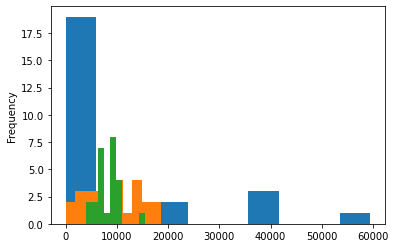

In [136]:
size_estimates.groupby('sample_size')['estimate'].plot.hist()

In [185]:
sss = sorted(too_large + reduced, key=lambda x: x.names_str)
names = [ss.names_str for ss in sss]
n = len(sss)
overlap = np.zeros((n,n), dtype=float)
for i in range(n):
    overlap[i,i] = np.nan
with tqdm(total=n*(n-1)//2) as progress:
    for i in range(n):
        for j in range(i+1, n):
            progress.set_description(f'estimating intersection ({i},{j})', refresh=False)
            progress.update()
            overlap[i,j] = overlap[j,i] = sss[i].estimate_intersection_size(
                sss[j], random, 2000, rate_floor_clamp=0)

overlap = pd.DataFrame(overlap, index=names, columns=names)
overlap

estimating intersection (3,4): 100%|██████████| 10/10 [05:33<00:00, 33.36s/it]


,"x0, x1, x10, x11, x12, x5, x6, x7, x8, x9, y0, y1, y2, y3, y4, y5, y7, y8, y9, z0, z1, z11, z2, z3, z5, z6, z8, z9","x2, x4, y12, z7","x3, y11","y10, y6, z4","z10, z12"
"x0, x1, x10, x11, x12, x5, x6, x7, x8, x9, y0, y1, y2, y3, y4, y5, y7, y8, y9, z0, z1, z11, z2, z3, z5, z6, z8, z9",NaN,0.000000e+00,6.766272e+01,6.621909e+05,5.006627e+03
"x2, x4, y12, z7",0.00000,NaN,5.904303e+07,4.433055e+09,5.162567e+08
"x3, y11",67.66272,5.904303e+07,NaN,6.912722e+07,1.241273e+06
"y10, y6, z4",662190.91092,4.433055e+09,6.912722e+07,NaN,3.139744e+07
"z10, z12",5006.62668,5.162567e+08,1.241273e+06,3.139744e+07,NaN


In [188]:
np.random.RandomState?

In [183]:
ns = np.array([len(ss) for ss in sss])
max_overlap = ns[::, None] * ns[None, ::]
max_overlap = pd.DataFrame(max_overlap, index=names, columns=names)
max_overlap

,"x0, x1, x10, x11, x12, x5, x6, x7, x8, x9, y0, y1, y2, y3, y4, y5, y7, y8, y9, z0, z1, z11, z2, z3, z5, z6, z8, z9","x2, x4, y12, z7","x3, y11","y10, y6, z4","z10, z12"
"x0, x1, x10, x11, x12, x5, x6, x7, x8, x9, y0, y1, y2, y3, y4, y5, y7, y8, y9, z0, z1, z11, z2, z3, z5, z6, z8, z9",68757264,3396121272,45108480,266073696,20066640
"x2, x4, y12, z7",3396121272,167744308356,2228039040,13142153808,991149720
"x3, y11",45108480,2228039040,29593600,174558720,13164800
"y10, y6, z4",266073696,13142153808,174558720,1029639744,77652960
"z10, z12",20066640,991149720,13164800,77652960,5856400


In [184]:
overlap / max_overlap

,"x0, x1, x10, x11, x12, x5, x6, x7, x8, x9, y0, y1, y2, y3, y4, y5, y7, y8, y9, z0, z1, z11, z2, z3, z5, z6, z8, z9","x2, x4, y12, z7","x3, y11","y10, y6, z4","z10, z12"
"x0, x1, x10, x11, x12, x5, x6, x7, x8, x9, y0, y1, y2, y3, y4, y5, y7, y8, y9, z0, z1, z11, z2, z3, z5, z6, z8, z9",NaN,0.000000,0.000000,0.002940,0.000000
"x2, x4, y12, z7",0.00000,NaN,0.056000,0.353488,0.527548
"x3, y11",0.00000,0.056000,NaN,0.348280,0.099824
"y10, y6, z4",0.00294,0.353488,0.348280,NaN,0.422492
"z10, z12",0.00000,0.527548,0.099824,0.422492,NaN


<AxesSubplot:ylabel='Frequency'>

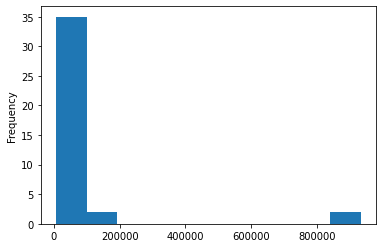

In [85]:
overlap.max().plot.hist()

<AxesSubplot:ylabel='Frequency'>

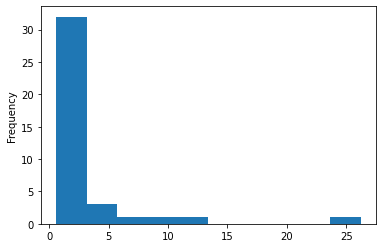

In [84]:
overlap.min().plot.hist()

<AxesSubplot:>

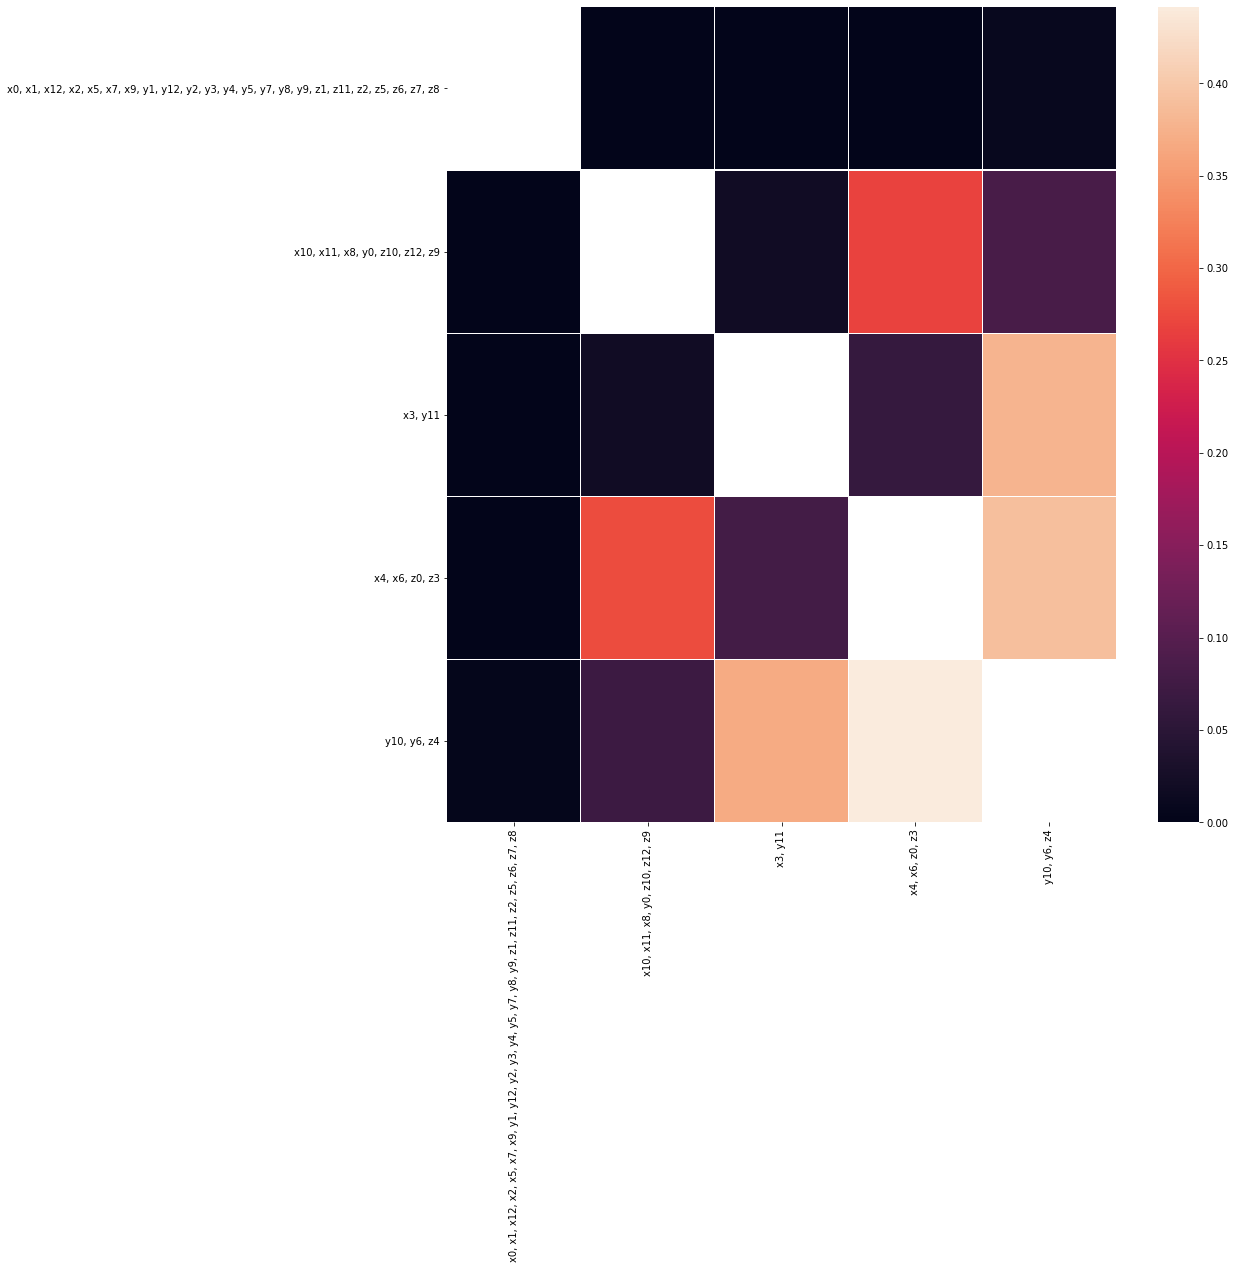

In [174]:
f = plt.figure(figsize=(15, 15))
ax = f.add_subplot(111)
sns.heatmap((overlap), linewidth=0.05, ax=ax)

In [13]:
while len(solution_sets) > 1:
    solution_sets = solver.reduce_solution_sets_using_best_pair_intersections(solution_sets)

reduce x4, y8, z1 n=853 & y8, y9, z1 n=274: 100%|██████████| 37/37 [01:32<00:00,  2.49s/it]    
reduce x4, x6, y8, z1 n=853 & x6, y8, y9, z1 n=274: 100%|██████████| 33/33 [01:30<00:00,  2.73s/it]           
reduce x4, x6, y2, y8, z1 n=1024 & x6, y2, y8, y9, z1 n=548: 100%|██████████| 32/32 [03:42<00:00,  6.94s/it]          
reduce x1, x6, y2, y8, z1, z2 n=102 & x12, x6, y1, y2, y8, z1 n=336:  15%|█▌        | 4/26 [03:13<17:42, 48.30s/it]         


KeyboardInterrupt: 

In [155]:
ss = [next(iter(x)) for x in reduced]
acc = ss[0]
for i,s in enumerate(ss[1::]):
    n = acc.intersection(s)
    if n is None:
        print('failure', i)
        break
    acc = n

failure 1


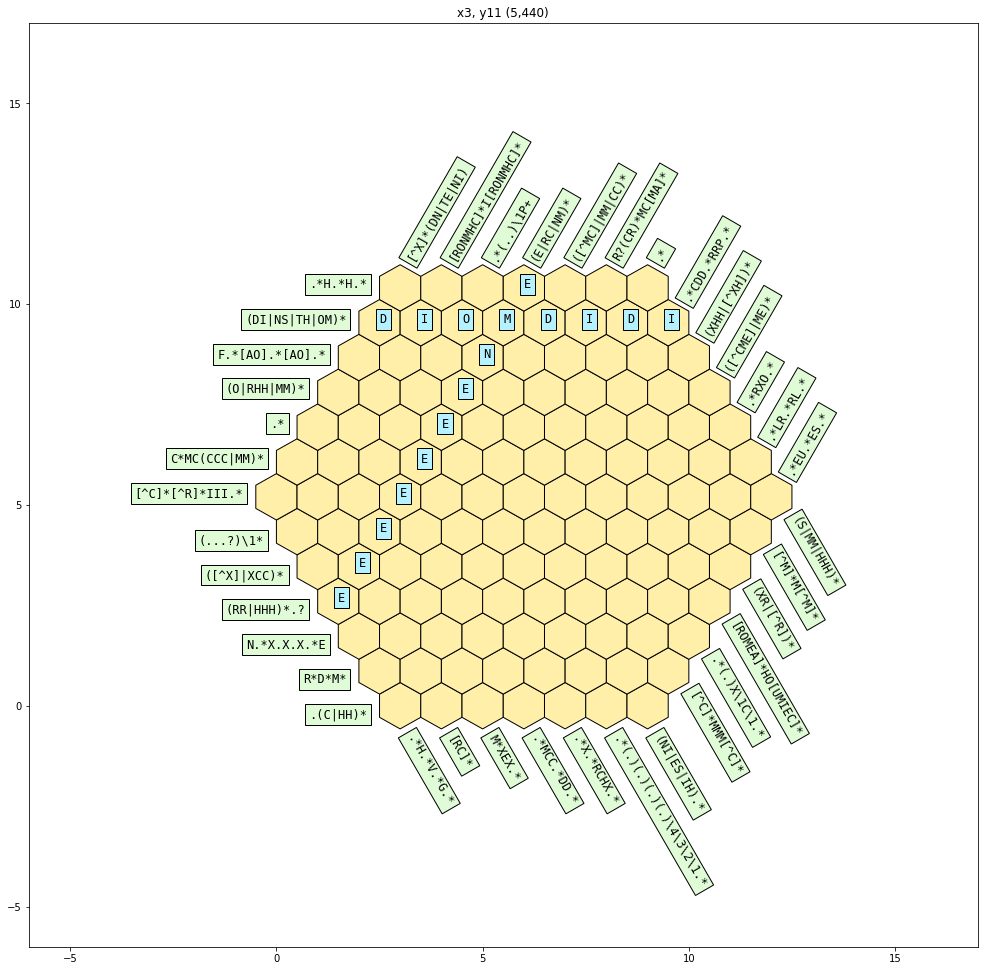

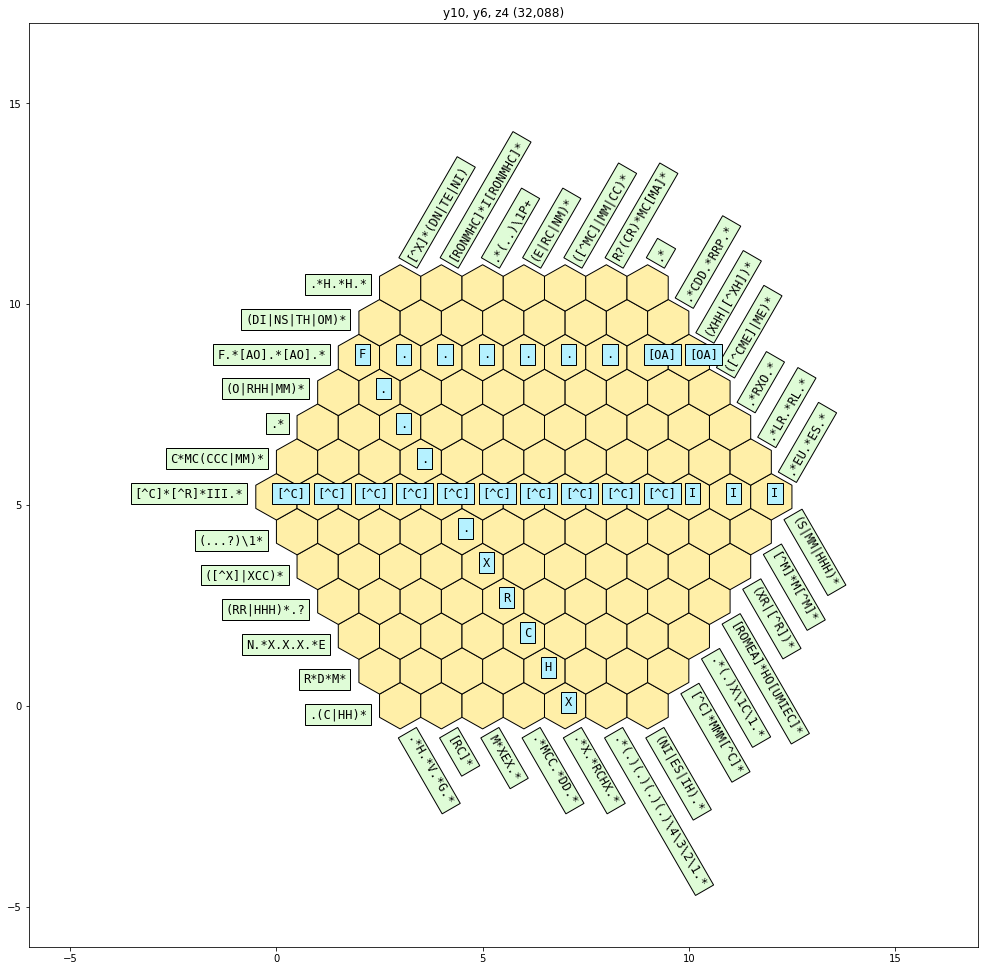

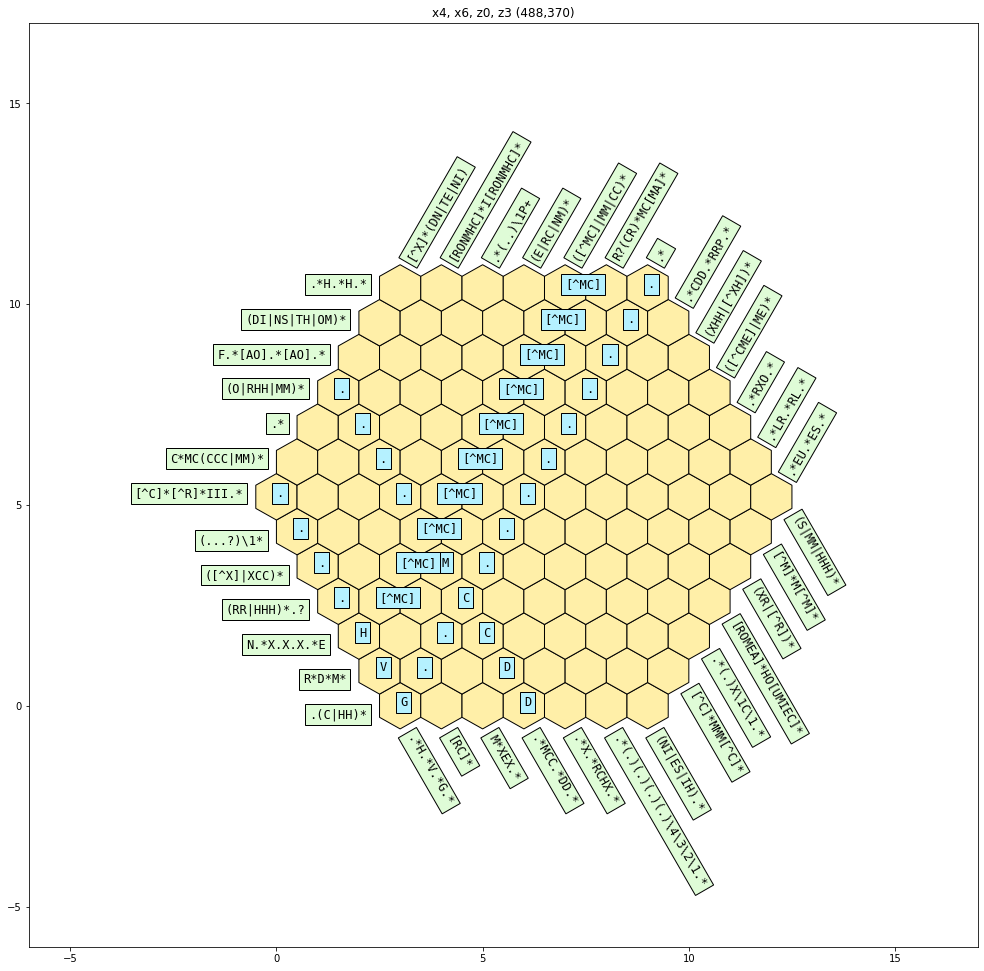

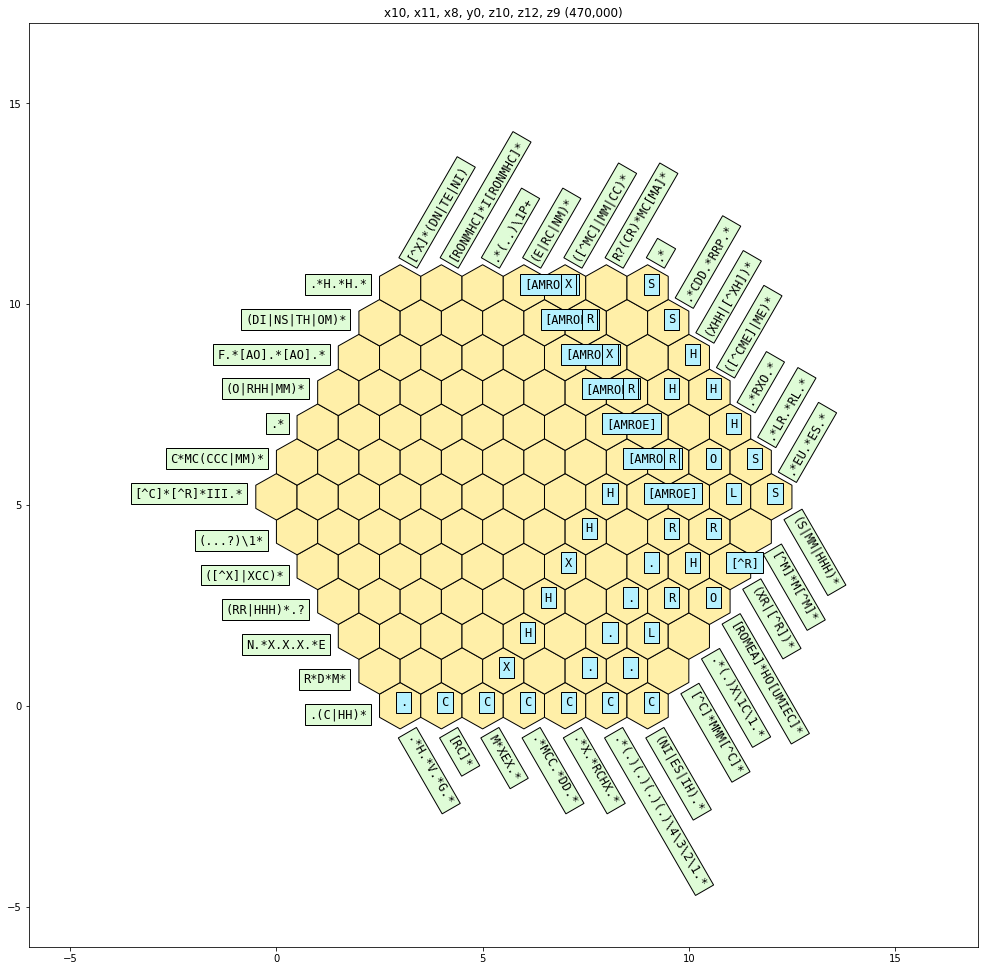

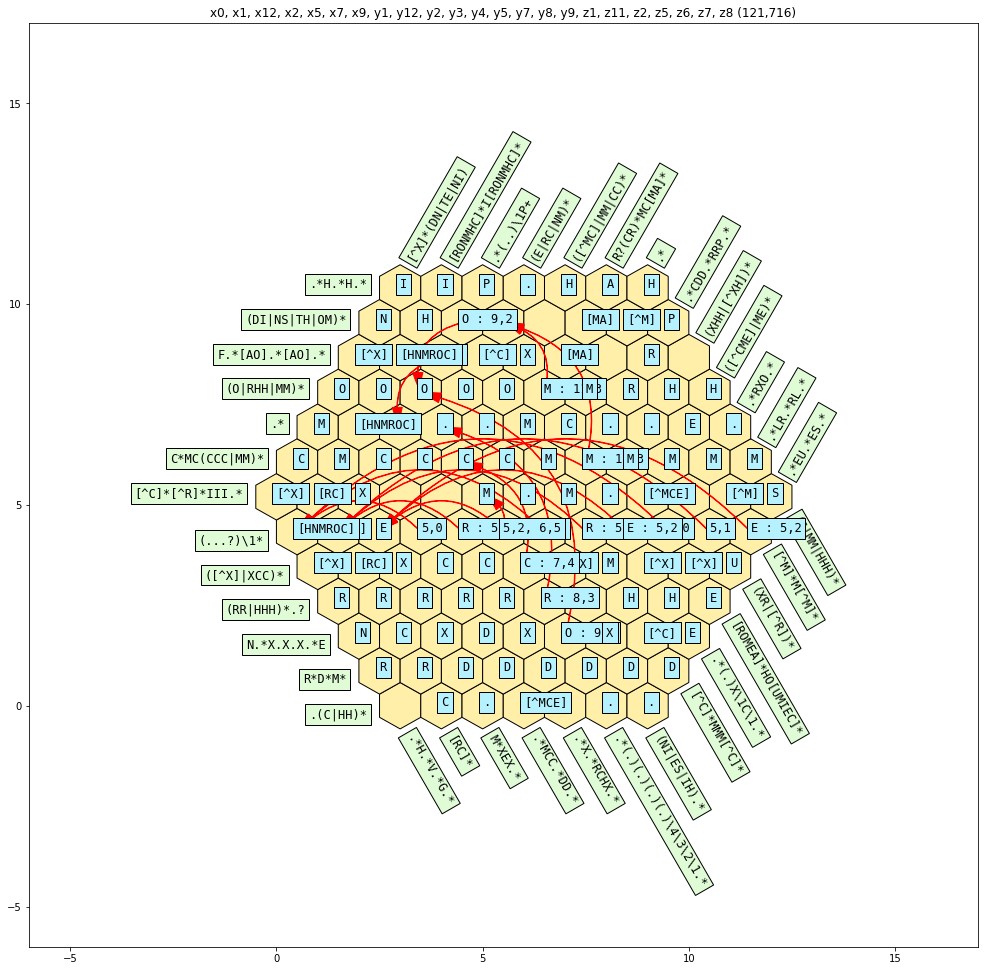

In [163]:
for ss in sorted(reduced, key=lambda ss: len(ss.cell_indices)):
    solver.draw_puzzle(fig_size=17, fontsize=12, solution=next(iter(ss)))
    plt.title(f'{ss.names_str} ({len(ss):,})')

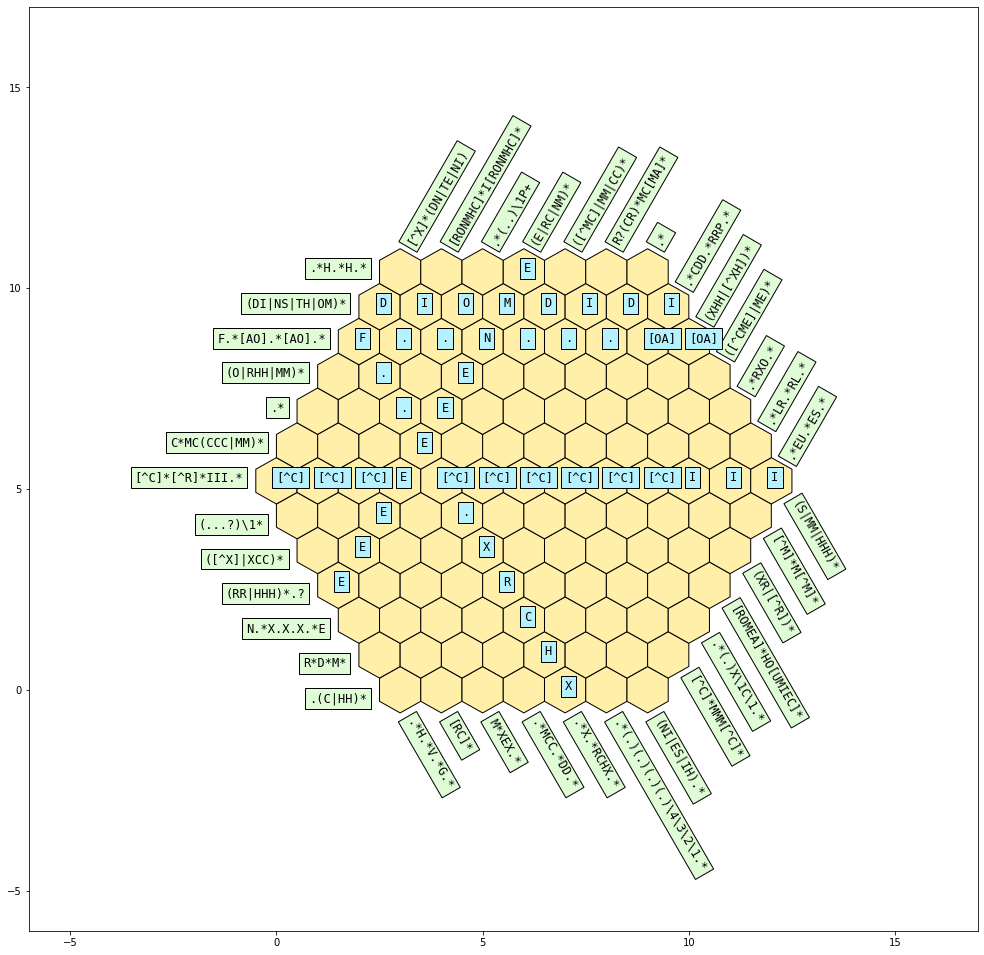

In [156]:
solution = max((s for ss in reduced for s in ss), key=lambda s: len(s.cells))
solver.draw_puzzle(fig_size=17, fontsize=12, solution=solution)

In [448]:
name_counts = pd.Series(Counter(n for s in solution_sets for n in s.names)).sort_index()
print(len(name_counts))
name_counts

39


x0      3
x1      1
x10     1
x11     1
x12     1
x2      1
x3      1
x4      1
x5      1
x6     17
x7      1
x8      1
x9      1
y0      1
y1      1
y10     1
y11     1
y12     1
y2      1
y3      1
y4      1
y5      1
y6      1
y7      1
y8      9
y9      1
z0      1
z1     12
z10     1
z11     1
z12     1
z2      1
z3      1
z4      1
z5      1
z6      1
z7      1
z8      1
z9      1
dtype: int64

In [451]:
pd.DataFrame([
    {'names': ','.join(sorted(s.names)),
     'size': len(s)}
    for s in solution_sets
]).sort_values('size', ascending=False)

,names,size
17,"x4,z1",853
9,"x6,y9",274
16,"x3,z1",256
11,"x0,y11",192
21,"x9,y8",89
6,"y6,z1",63
35,"x6,z10",55
37,"x6,z12",44
20,"x8,y8",41
25,"x6,z0",35


<AxesSubplot:>

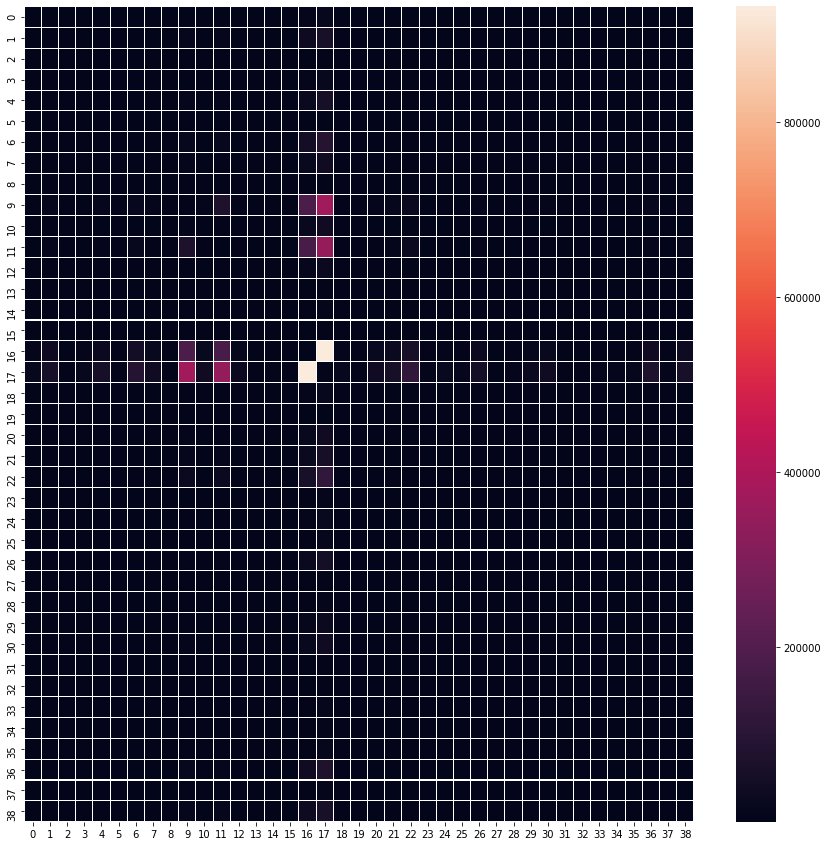

In [334]:
counts = np.array(string_solutions_df['count'])
counts_prod = counts[::, None] * counts[None, ::]
ix = np.arange(len(counts))
counts_prod[ix, ix] = counts
f = plt.figure(figsize=(15, 15))
ax = f.add_subplot(111)
sns.heatmap(counts_prod, linewidth=0.05, ax=ax)

In [351]:
def count_pair_solutions(i, j):
    if i==j:
        return counts[i]
    axis_i = strings_df['axis'].iloc[i]
    axis_j = strings_df['axis'].iloc[j]
    if axis_i == axis_j:
        return counts[i] * counts[j]
    
    lazy_solutions = solver.merge_two_solutions_seq(
        xs=solver.SolutionSource('i', string_solutions[i]),
        ys=solver.SolutionSource('j', string_solutions[j]),
        callback=lambda *args: None
    ).solutions
    return sum(1 for _ in lazy_solutions)

n = len(strings)
count_pair_solutions(5, 9)

548

In [359]:
axis_indexes = {axis:df.index.values for axis,df in strings_df.groupby('axis')}
axis_indexes

{'x': array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
 'y': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 'z': array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])}

In [380]:
strings_df['name']

0      y0
1      y1
2      y2
3      y3
4      y4
5      y5
6      y6
7      y7
8      y8
9      y9
10    y10
11    y11
12    y12
13     x0
14     x1
15     x2
16     x3
17     x4
18     x5
19     x6
20     x7
21     x8
22     x9
23    x10
24    x11
25    x12
26     z0
27     z1
28     z2
29     z3
30     z4
31     z5
32     z6
33     z7
34     z8
35     z9
36    z10
37    z11
38    z12
Name: name, dtype: object

In [413]:
def compute_axis_intersection_solutions(axis_a, axis_b):
    sz = constants.size
    indexes_a = axis_indexes[axis_a]
    assert len(indexes_a) == sz
    indexes_b = axis_indexes[axis_b]
    assert len(indexes_b) == sz
    
    data = np.zeros(shape=(sz, sz), dtype=int)
    with tqdm(total=sz**2) as t:
        for i,index_a in enumerate(indexes_a):
            for j,index_b in enumerate(indexes_b):
                t.update()           
                data[i,j] = count_pair_solutions(index_a, index_b)
    return pd.DataFrame(data,
                        index=strings_df['name'].iloc[indexes_a],
                        columns=strings_df['name'].iloc[indexes_b])
    
data = compute_axis_intersection_solutions('y', 'z')

100%|██████████| 169/169 [00:01<00:00, 101.46it/s]


In [414]:
'{:,}'.format(data.max().max())

'9,590'

In [415]:
data.div(data.max().max()).mul(100).astype(int)

name,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12
name,,,,,,,,,,,,,
y0,4,0,0,2,2,0,0,1,0,1,7,1,5
y1,9,0,2,6,7,2,1,4,3,4,25,3,20
y2,0,0,0,0,0,0,0,0,0,0,1,0,1
y3,2,0,0,1,1,0,0,0,0,0,6,1,5
y4,12,0,1,7,7,2,1,2,2,3,20,3,18
y5,0,0,0,0,0,0,0,0,0,0,1,0,0
y6,23,0,4,10,15,3,2,6,4,5,28,5,25
y7,9,0,0,4,5,1,0,1,1,1,6,0,3
y8,0,0,0,0,0,0,0,0,0,0,0,0,0


In [421]:
strings_df.reset_index().set_index('name').loc['z1']

index         27
axis           z
pattern    [RC]*
size           8
Name: z1, dtype: object

In [422]:
{a:i for i,a in enumerate([1,2,1,2,3])}

{1: 2, 2: 3, 3: 4}

In [423]:
any([])

False

In [420]:
counts[9]

274

<AxesSubplot:xlabel='name', ylabel='name'>

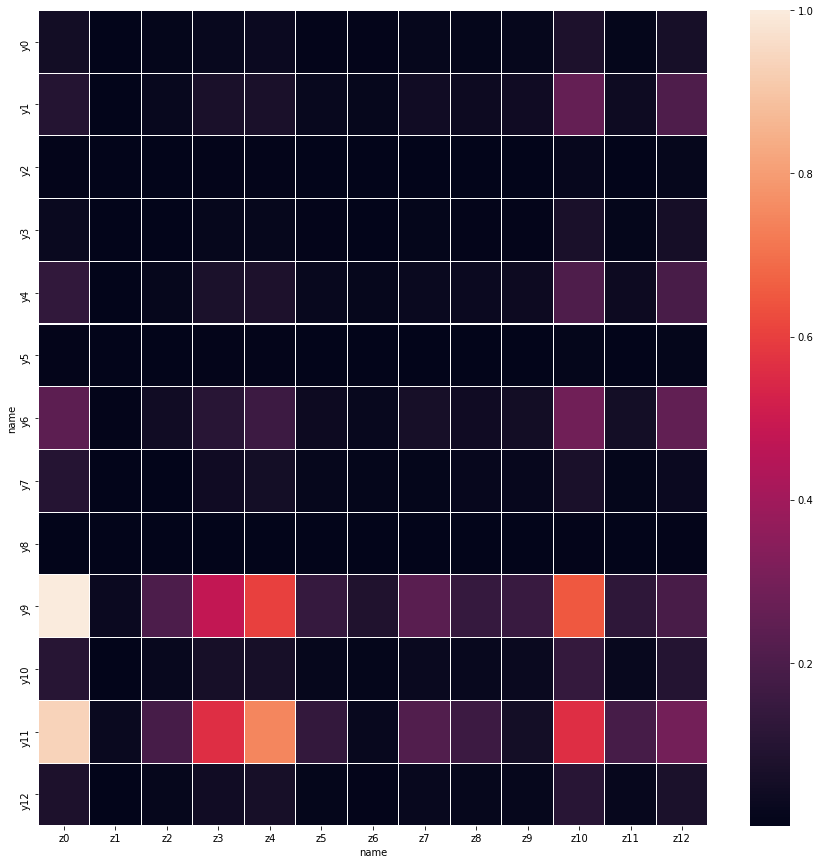

In [418]:
f = plt.figure(figsize=(15, 15))
ax = f.add_subplot(111)
sns.heatmap(data / data.max().max(), linewidth=0.05, ax=ax)

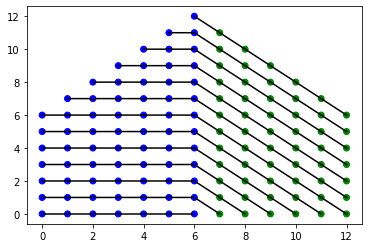

In [59]:
plt.plot()
mid = constants.size // 2
for i, s in enumerate(constants.x):
    points = []
    start = max(0, i-mid)
    end = min(i + mid + 1, constants.size)
    for j in range(start, end):
        x = j
        y = i if j <= mid else mid + i - j
        points.append([x, y, y >= solver.row_size(x),
                       'b' if j <= mid else 'g'])
    x, y, inv, c = map(np.array, zip(*points))
    plt.scatter(x, y, c=c)
    plt.plot(x, y, 'k-')
    if any(inv):
        plt.scatter(x[inv], y[inv], c='r', marker='*', s=200)

    

In [258]:
patterns = pd.DataFrame(
    [{'dim': dim, 'ix':ix, 'pat': pat}
        for dim, pats in constants.dims.items()
        for ix, pat in enumerate(pats)
    ])
patterns

,dim,ix,pat
0,x,0,[^X]*(DN|TE|NI)
1,x,1,[RONMHC]*I[RONMHC]*
2,x,2,.*(..)\1P+
3,x,3,(E|RC|NM)*
4,x,4,([^MC]|MM|CC)*
5,x,5,R?(CR)*MC[MA]*
6,x,6,.*
7,x,7,.*CDD.*RRP.*
8,x,8,(XHH|[^XH])*
9,x,9,([^CME]|ME)*


In [61]:
parsed = [sre_parse.parse(s) for s in patterns['pat']]

In [62]:
patterns['low'], patterns['high'] = zip(*(p.getwidth() for p in parsed))

In [ ]:
patterns

In [63]:
def gen_op_arg(pix, op, arg):
    yield dict(pix=pix, op=op, arg=arg)
    if op == sre_constants.SUBPATTERN:
        group, add_flags, del_flags, p = arg
        yield from gen_op_args(pix, p)
    elif op == sre_constants.MAX_REPEAT:
        mn, mx, p = arg
        yield from gen_op_args(pix, p)
    elif op == sre_constants.BRANCH:
        x, bs = arg
        assert x is None
        for b in bs:
            yield from gen_op_args(pix, b)
    elif op == sre_constants.IN:
        yield from gen_op_args(pix, arg)
        
        

def gen_op_args(pix, op_args):
    for op, arg in op_args:
        yield from gen_op_arg(pix, op, arg)
    

ops = pd.DataFrame([x
                    for pix,p in enumerate(parsed)
                    for x in gen_op_args(pix, p.data)],
                   dtype=object)
ops

,pix,op,arg
0,0,MAX_REPEAT,"(0, MAXREPEAT, [(NOT_LITERAL, 88)])"
1,0,NOT_LITERAL,88
2,0,SUBPATTERN,"(1, 0, 0, [(BRANCH, (None, [[(LITERAL, 68), (L..."
3,0,BRANCH,"(None, [[(LITERAL, 68), (LITERAL, 78)], [(LITE..."
4,0,LITERAL,68
...,...,...,...
357,38,LITERAL,77
358,38,LITERAL,77
359,38,LITERAL,72
360,38,LITERAL,72


In [64]:
ops['op'].map(str).value_counts()

LITERAL        167
MAX_REPEAT      75
ANY             53
SUBPATTERN      22
BRANCH          14
IN              11
NOT_LITERAL      9
GROUPREF         8
NEGATE           3
Name: op, dtype: int64

In [65]:
ops.groupby('op').apply(lambda df : df.sample(min(5, len(df))))

pix           op                                                arg
op                                                                        
2  192  20          ANY                                               None
   169  17          ANY                                               None
   122  12          ANY                                               None
   214  22          ANY                                               None
   31    2          ANY                                               None
7  37    3       BRANCH  (None, [[(LITERAL, 69)], [(LITERAL, 82), (LITE...
   300  32       BRANCH  (None, [[(LITERAL, 78), (LITERAL, 73)], [(LITE...
   344  36       BRANCH  (None, [[(LITERAL, 88), (LITERAL, 82)], [(NOT_...
   45    4       BRANCH  (None, [[(IN, [(NEGATE, None), (LITERAL, 77), ...
   200  21       BRANCH  (None, [[(NOT_LITERAL, 88)], [(LITERAL, 88), (...
12 293  31     GROUPREF                                                  4
   294  31     GROUPREF                                                  3
   295  31     GROUPREF                                                  2
   321  34     GROUPREF                                                  1
   197  20     GROUPREF                                                  1
14 327  35           IN  [(LITERAL, 82), (LITERAL, 79), (LITERAL, 77), ...
   63    5           IN                     [(LITERAL, 77), (LITERAL, 65)]
   154  15           IN                     [(LITERAL, 65), (LITERAL, 79)]
   251  27           IN                     [(LITERAL, 82), (LITERAL, 67)]
   86    8           IN     [(NEGATE, None), (LITERAL, 88), (LITERAL, 72)]
17 210  22      LITERAL                                                 72
   139  14      LITERAL                                                 73
   155  15      LITERAL                                                 65
   59    5      LITERAL                                                 82
   166  16      LITERAL                                                 77
21 347  36  NOT_LITERAL                                                 82
   352  37  NOT_LITERAL                                                 77
   185  19  NOT_LITERAL                                                 82
   349  37  NOT_LITERAL                                                 77
   183  19  NOT_LITERAL                                                 67
22 47    4       NEGATE                                               None
   87    8       NEGATE                                               None
   94    9       NEGATE                                               None
26 285  31   SUBPATTERN                           (1, 0, 0, [(ANY, None)])
   175  18   SUBPATTERN  (1, 0, 0, [(BRANCH, (None, [[(LITERAL, 67), (L...
   206  22   SUBPATTERN  (1, 0, 0, [(BRANCH, (None, [[(LITERAL, 82), (L...
   91    9   SUBPATTERN  (1, 0, 0, [(BRANCH, (None, [[(IN, [(NEGATE, No...
   343  36   SUBPATTERN  (1, 0, 0, [(BRANCH, (None, [[(LITERAL, 88), (L...
42 54    5   MAX_REPEAT                            (0, 1, [(LITERAL, 82)])
   194  20   MAX_REPEAT                              (0, 1, [(ANY, None)])
   353  38   MAX_REPEAT  (0, MAXREPEAT, [(SUBPATTERN, (1, 0, 0, [(BRANC...
   205  22   MAX_REPEAT  (0, MAXREPEAT, [(SUBPATTERN, (1, 0, 0, [(BRANC...
   90    9   MAX_REPEAT  (0, MAXREPEAT, [(SUBPATTERN, (1, 0, 0, [(BRANC...

In [66]:
for _,row in ops[ops['op'] == sre_constants.IN].iterrows():
    display(row.to_frame().T)
    display(patterns.iloc[row['pix']].to_frame().T)
    display(row['arg'])
    print('-' * 80)

,pix,op,arg
11,1,IN,"[(LITERAL, 82), (LITERAL, 79), (LITERAL, 78), ..."


,dim,ix,pat,low,high
1,x,1,[RONMHC]*I[RONMHC]*,1,4294967295


[(LITERAL, 82),
 (LITERAL, 79),
 (LITERAL, 78),
 (LITERAL, 77),
 (LITERAL, 72),
 (LITERAL, 67)]

--------------------------------------------------------------------------------


,pix,op,arg
20,1,IN,"[(LITERAL, 82), (LITERAL, 79), (LITERAL, 78), ..."


,dim,ix,pat,low,high
1,x,1,[RONMHC]*I[RONMHC]*,1,4294967295


[(LITERAL, 82),
 (LITERAL, 79),
 (LITERAL, 78),
 (LITERAL, 77),
 (LITERAL, 72),
 (LITERAL, 67)]

--------------------------------------------------------------------------------


,pix,op,arg
46,4,IN,"[(NEGATE, None), (LITERAL, 77), (LITERAL, 67)]"


,dim,ix,pat,low,high
4,x,4,([^MC]|MM|CC)*,0,4294967295


[(NEGATE, None), (LITERAL, 77), (LITERAL, 67)]

--------------------------------------------------------------------------------


,pix,op,arg
63,5,IN,"[(LITERAL, 77), (LITERAL, 65)]"


,dim,ix,pat,low,high
5,x,5,R?(CR)*MC[MA]*,2,4294967295


[(LITERAL, 77), (LITERAL, 65)]

--------------------------------------------------------------------------------


,pix,op,arg
86,8,IN,"[(NEGATE, None), (LITERAL, 88), (LITERAL, 72)]"


,dim,ix,pat,low,high
8,x,8,(XHH|[^XH])*,0,4294967295


[(NEGATE, None), (LITERAL, 88), (LITERAL, 72)]

--------------------------------------------------------------------------------


,pix,op,arg
93,9,IN,"[(NEGATE, None), (LITERAL, 67), (LITERAL, 77),..."


,dim,ix,pat,low,high
9,x,9,([^CME]|ME)*,0,4294967295


[(NEGATE, None), (LITERAL, 67), (LITERAL, 77), (LITERAL, 69)]

--------------------------------------------------------------------------------


,pix,op,arg
149,15,IN,"[(LITERAL, 65), (LITERAL, 79)]"


,dim,ix,pat,low,high
15,y,2,F.*[AO].*[AO].*,3,4294967295


[(LITERAL, 65), (LITERAL, 79)]

--------------------------------------------------------------------------------


,pix,op,arg
154,15,IN,"[(LITERAL, 65), (LITERAL, 79)]"


,dim,ix,pat,low,high
15,y,2,F.*[AO].*[AO].*,3,4294967295


[(LITERAL, 65), (LITERAL, 79)]

--------------------------------------------------------------------------------


,pix,op,arg
251,27,IN,"[(LITERAL, 82), (LITERAL, 67)]"


,dim,ix,pat,low,high
27,z,1,[RC]*,0,4294967295


[(LITERAL, 82), (LITERAL, 67)]

--------------------------------------------------------------------------------


,pix,op,arg
327,35,IN,"[(LITERAL, 82), (LITERAL, 79), (LITERAL, 77), ..."


,dim,ix,pat,low,high
35,z,9,[ROMEA]*HO[UMIEC]*,2,4294967295


[(LITERAL, 82), (LITERAL, 79), (LITERAL, 77), (LITERAL, 69), (LITERAL, 65)]

--------------------------------------------------------------------------------


,pix,op,arg
336,35,IN,"[(LITERAL, 85), (LITERAL, 77), (LITERAL, 73), ..."


,dim,ix,pat,low,high
35,z,9,[ROMEA]*HO[UMIEC]*,2,4294967295


[(LITERAL, 85), (LITERAL, 77), (LITERAL, 73), (LITERAL, 69), (LITERAL, 67)]

--------------------------------------------------------------------------------


In [116]:
s.name

''

In [98]:
solutions = [next(iter(solver.Solution.generate_solutions(s))) for s in strings]
a = solutions[0]
b = solutions[1]

In [ ]:
for i,row in patterns.sample(n=10, random_state=0xCAFE).iterrows():
    display(row.to_frame().T)
    parsed[i].dump()
    print('-'*80)

In [ ]:
p = sre_parse.parse(constants.x[0])
p.dump()

In [ ]:
p.data

In [ ]:
p.getwidth()

In [ ]:
PatchCollection?

In [ ]:
[solver.row_size(i) for i in range(constants.size)]

In [ ]:
x,y = MarkerPath.unit_regular_polygon(6).vertices.T
plt.plot(x,y)

In [ ]:
1 / (x.max() - x.min())

In [ ]:
1 / (y.max() - y.min())

In [ ]:
0.577 / 0.5

In [ ]:
unit_hex = plt.Polygon(MarkerPath.unit_regular_polygon(6).vertices,
                       edgecolor='k', linewidth=1, fill=True, facecolor='#ffefa8')
unit_hex.set_transform(Affine2D().scale(0.577))

vscale = 1 / 1.154

def position(i, j):
    x = j + (constants.size - solver.row_size(i)) / 2.0
    y = i * vscale
    return x, y


patches = []
for i in range(constants.size):
    for j in range(solver.row_size(i)):
        x,y = position(i, j)
        patch = copy.copy(unit_hex)
        patch.set_transform(patch.get_transform() + Affine2D().translate(x, y))
        patches.append(patch)
        
p = PatchCollection(patches, match_original=True)


f = plt.figure(figsize=(11, 11))
ax = f.add_subplot(111)

ax.add_collection(p)

def text(x, y, s, **kwds):
    ax.text(x, y, s, fontsize=13, bbox=dict(facecolor='#dffcd7', edgecolor='k'), **kwds)

mid = constants.size // 2
for i,v in enumerate(constants.x[:mid + 1:]):
    x, y = position(12, i)
    text(x + 0.1, y + 0.7, v, rotation=60)
    
for i,v in enumerate(constants.x[mid + 1::]):
    r = constants.size - i - 1
    x, y = position(r, solver.row_size(r))
    text(x - 0.3, y - 0.3, v, rotation=60)
    
for i,v in enumerate(constants.y[:mid + 1:]):
    r = constants.size - i - 1
    x, y = position(r, 0)
    text(x - 0.8, y, v, horizontalalignment='right')
    
for i,v in enumerate(constants.y[mid + 1::]):
    r = mid - i - 1
    x, y = position(r, 0)
    text(x - 0.8, y - 0.3, v, horizontalalignment='right')
    
for i,v in enumerate(constants.z[:mid + 1:]):
    x, y = position(0, i)
    text(x + 0.15, y - 0.8, v, rotation=-60, rotation_mode='anchor')
    
for i,v in enumerate(constants.z[mid + 1::]):
    x, y = position(i, solver.row_size(i))
    text(x, y + 0.3, v, rotation=-60, rotation_mode='anchor')

ax.set_xlim(-5, 16)
ax.set_ylim(-5, 16)


In [ ]:
patch._transform._mtx

In [ ]:
vars(patch)

In [ ]:
ax.add_patch??